In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
mat = loadmat('ex7data2.mat')
X = mat['X']

In [3]:
#X = np.array([[ 1.84207953,  4.6075716 ],[ 5.65858312,  4.79996405],[ 6.35257892,  3.2908545 ],[ 2.90401653,  4.61220411],[ 3.23197916,  4.93989405],
# [ 1.24792268,  4.93267846],[ 6.28438193,  3.17360643],[ 4.20584789,  2.81647368],[ 5.32615581,  3.03314047],[ 7.17135204,  3.4122727 ]])

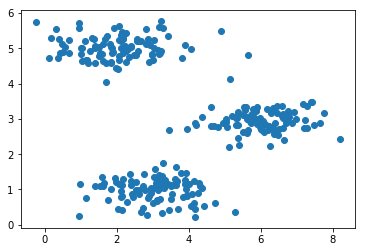

In [4]:
# Visualize the data
plt.scatter(X[:,0], X[:,1])
plt.show()

In [5]:
# Find Closest Centroid
def findClosesestCentroid(X, centroid):
    
    m, n = X.shape
    k = centroid.shape[0]
    idx = np.zeros((m,1))
    temp = np.zeros((k,1))
    
    for i in range(m):
        for j in range(k):
            dist = X[i,:] - centroid[j,:]
            length = np.sum(dist**2)
            temp[j] = length
        idx[i] = np.argmin(temp)+1
            
    return idx

In [6]:
centroids = np.array([[3,3],[5,7],[3,5]])
idx = findClosesestCentroid(X, centroids)
idx[0:3]

array([[3.],
       [2.],
       [1.]])

In [7]:
def calculateCentroids(X, idx, k):
    
    m, n = X.shape
    #print('m: ',m,', n: ',n)
    centroids = np.zeros((k,n))
    count = np.zeros((k,1))
    
    for i in range(m):
        index = int((idx[i]-1)[0])
        #print('index: ',index)
        centroids[index,:] += X[i,:]
        #print('centroids: ',centroids)
        count[index] +=1
        #print('count: ',count)
        
    return centroids/count

In [8]:
centroids = calculateCentroids(X, idx, k=3)

In [10]:
def pltKmeansCluster(X, centroids, k, idx, num_iterations):
    
    m, n = X.shape
    
    fig, ax = plt.subplots(nrows=num_iterations, ncols=1, figsize=(6,36))
    
    for i in range(num_iterations):
        color = "rgb"
        for j in range(1, k+1):
            grp = (idx==j).reshape(m,1)
            ax[i].scatter(X[grp[:,0],0], X[grp[:,0],1], c = color[j-1], s = 15)
        ax[i].scatter(centroids[:,0], centroids[:,1], c = 'black', marker='x', linewidth=3, s=120)
    
        # Calculate Centroids
        centroids = calculateCentroids(X, idx, k)

        # Colosesest Centroids
        idx = findClosesestCentroid(X, centroids)
    
    plt.tight_layout()

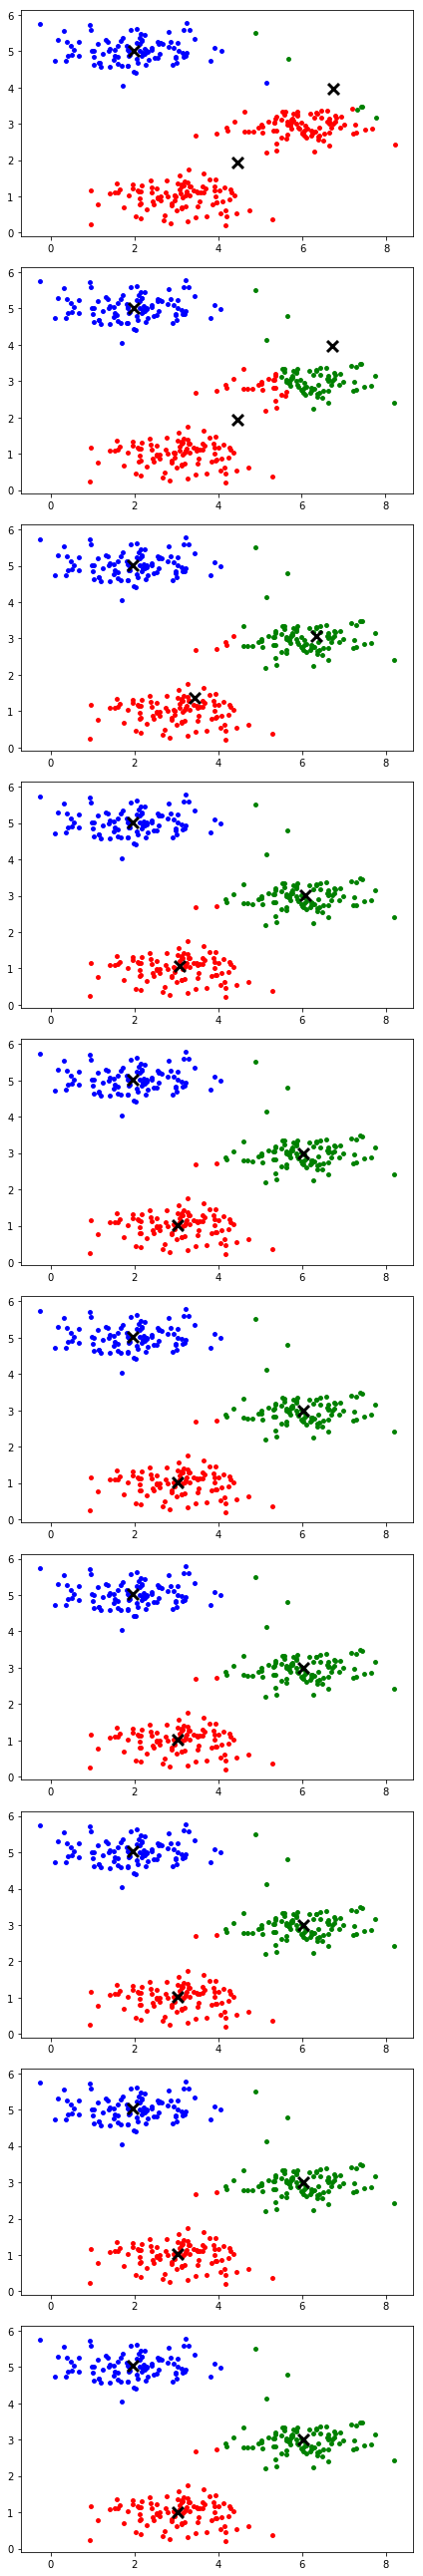

In [11]:
pltKmeansCluster(X, centroids, 3, idx, 10)

In [18]:
# Randomly assigning Centroids
def randomInitCentroids(X, k):
    
    m, n = X.shape
    centroids = np.zeros((k,n))
    
    for i in range(k):
        centroids[i,:] = X[int(np.random.randint(0,m+1)),:]
    
    return centroids

In [15]:
# Image Compression with K-means
bird_mat = loadmat('bird_small.mat')
A = bird_mat['A']
A.shape

(128, 128, 3)

In [21]:
A2 = (A/255).reshape(128*128,3)

In [22]:
def runKmeans(X, init_centroids, k, num_iterations):
    
    idx = findClosesestCentroid(X, init_centroids)
    
    for i in range(num_iterations):
        centroids = calculateCentroids(X, idx, k)
        
        idx = findClosesestCentroid(X, centroids)
    
    return idx, centroids

In [37]:
k = 6
centroids = randomInitCentroids(A2,k)
idx2, centroids2 = runKmeans(A2, centroids, k, 10)

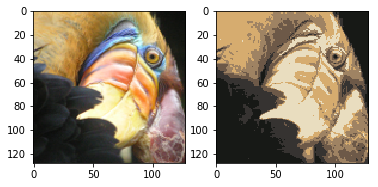

In [38]:
A2_recovered = A2.copy()
for i in range(1,k+1):
    A2_recovered[(idx2==i).ravel(),:] = centroids2[i-1]

# Reshape the recovered image into proper dimensions
A2_recovered = A2_recovered.reshape(128,128,3)

# Display the image
import matplotlib.image as mpimg
fig, ax = plt.subplots(1,2)
ax[0].imshow(A2.reshape(128,128,3))
ax[1].imshow(A2_recovered)

In [41]:
# PCA Implementation
mat = loadmat('ex7data1.mat')
X = mat['X']
X.shape

(50, 2)

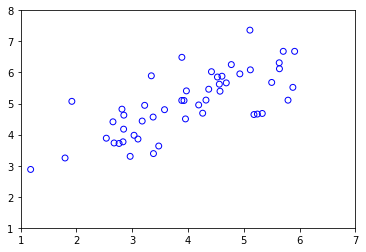

In [46]:
# Visualize the data
plt.scatter(X[:,0], X[:,1], facecolor='', s=35, edgecolor='b')
plt.xlim(1,7)
plt.ylim(1,8)
plt.show()

In [77]:
def normalization(X):
    
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X-mu)/sigma
    return X_norm, mu, sigma

In [78]:
def pca(X):
    
    m = X.shape[0]
    sigma = 1/m * X.T @ X
    
    U,S,V = np.linalg.svd(sigma)
    
    return U,S,V

In [80]:
X_norm, mu, sigma = normalization(X)
U, S = pca(X_norm)[:2]
S.shape

(2,)

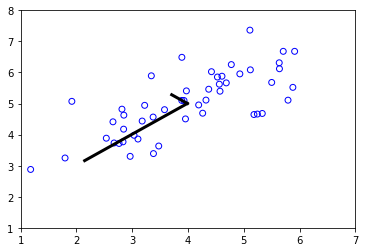

In [84]:
# Visualising the PCA
plt.scatter(X[:,0], X[:,1], facecolor='', s=35, edgecolor='b')
plt.plot([mu[0],(mu+1.5*S[0]*U[:,0].T)[0]],[mu[1],(mu+1.5*S[0]*U[:,0].T)[1]], c='black', linewidth=3 )
plt.plot([mu[0],(mu+1.5*S[1]*U[:,1].T)[0]],[mu[1],(mu+1.5*S[1]*U[:,1].T)[1]], c='black', linewidth=3 )
plt.xlim(1,7)
plt.ylim(1,8)
plt.show()

In [85]:
#Dimention Reduction with PCA
def dimentionReduction(X, U, k):
    
    m, n = X.shape
    U_reduce = U[:,:k]
    Z = np.zeros((m,k))
    
    for i in range(m):
        for j in range(k):
            Z[i,j] = X[i,:] @ U_reduce[:,j]
    
    return Z

In [87]:
k = 1
Z = dimentionReduction(X_norm, U, k)

In [90]:
# Recover Data
def recoverData(Z, U, k):
    
    m, n = Z.shape[0], U.shape[0]
    U_reduce = U[:,:k]
    X_recov = np.zeros((m,n))
    
    for i in range(m):
        X_recov[i,:] = Z[i,:] @ U_reduce.T
    
    return X_recov

In [91]:
X_recover = recoverData(Z, U, k)

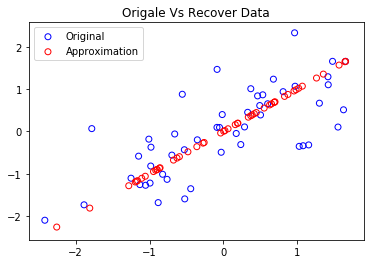

In [99]:
# Data project of original Vs recover data
plt.scatter(X_norm[:,0], X_norm[:,1], facecolor='none', edgecolor='b', label = 'Original')
plt.scatter(X_recover[:,0], X_recover[:,1], facecolor='none', edgecolor='r', label='Approximation')
plt.title('Origale Vs Recover Data')
plt.legend()

In [103]:
# Some Experiment on data using PCA
face_mat = loadmat('ex7faces.mat')
X3 = face_mat['X']
X3.shape

(5000, 1024)

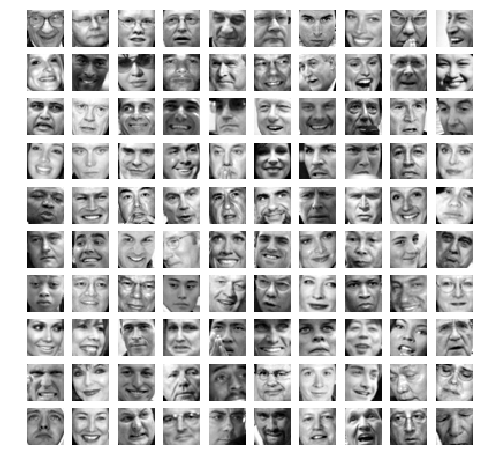

In [114]:
# Visualizing Data
fig, ax = plt.subplots(ncols=10, nrows=10, figsize=(8,8))

for i in range(0, 100, 10):
    for j in range(10):
        ax[int(i/10),j].imshow(X3[i+j,:].reshape(32,32, order='F'), cmap='gray')
        ax[int(i/10),j].axis('off')

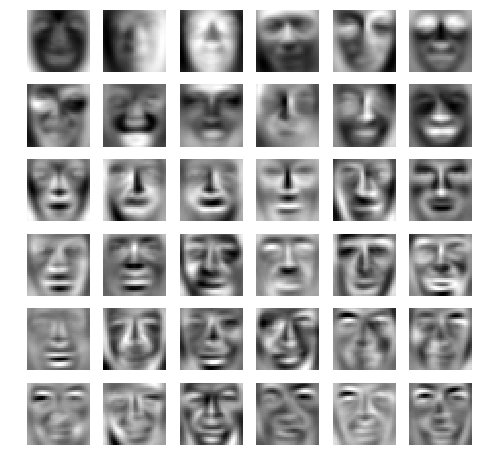

In [121]:
# Visualizing Data with dimention reduction
fig, ax = plt.subplots(ncols=6, nrows=6, figsize=(8,8))
X_norm = normalization(X3)[0]
U = pca(X_norm)[0]
U_reduce = U[:,:36].T
for i in range(0, 36, 6):
    for j in range(6):
        ax[int(i/6),j].imshow(U_reduce[i+j,:].reshape(32,32, order='F'), cmap='gray')
        ax[int(i/6),j].axis('off')

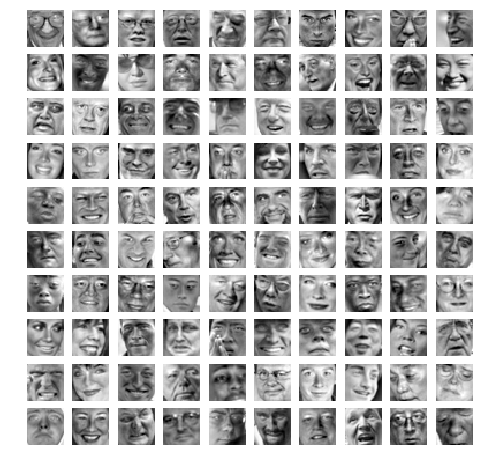

In [125]:
# Visualizing of recover data
k = 1024
Z = dimentionReduction(X_norm, U, k)
X_rec = recoverData(Z, U, k)

fig, ax = plt.subplots(ncols=10, nrows=10, figsize=(8,8))

for i in range(0, 100, 10):
    for j in range(10):
        ax[int(i/10),j].imshow(X_rec[i+j,:].reshape(32,32, order='F'), cmap='gray')
        ax[int(i/10),j].axis('off')